In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams.update({
    "font.size": 15,
    "font.family": "Arial"
})
bxwidth = 1

In [2]:
df = pd.read_csv("D:/pml/email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [3]:
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [4]:
print(df.describe())
print(df.info())      

       Category                 Message
count      5573                    5573
unique        3                    5158
top         ham  Sorry, I'll call later
freq       4825                      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [5]:
cols = df.columns
print(cols)

Index(['Category', 'Message'], dtype='object')


In [6]:

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(numeric_cols)

Index([], dtype='object')


In [7]:
print("No numeric columns are present")

No numeric columns are present


C:\Users\KESHA\AppData\Local\Temp\ipykernel_9964\1302838881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, edgecolor="black", palette="viridis")


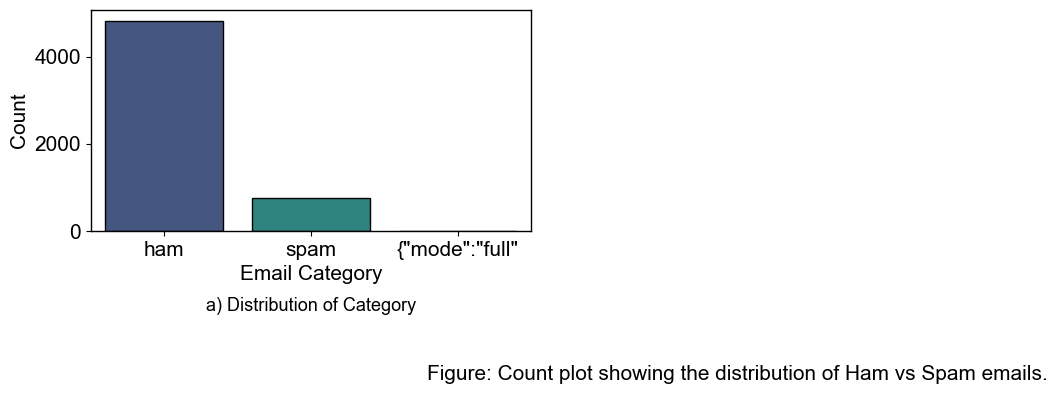

In [8]:
cat_cols = ['Category']
rows = math.ceil(len(cat_cols) / 3) 

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()
subplot_labels = [f"{chr(97+i)})" for i in range(len(cat_cols))]

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, edgecolor="black", palette="viridis")
    
    ax.set_title("")
    ax.set_xlabel("Email Category")
    ax.set_ylabel("Count")
    
    ax.text(0.5, -0.30, f"{subplot_labels[i]} Distribution of {col}", 
            ha="center", va="top", transform=ax.transAxes, fontsize=13)

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.01, "Figure: Count plot showing the distribution of Ham vs Spam emails.", 
         ha="center", fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("countplot_email_categories.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

In [9]:
df['word_count'] = df['Message'].apply(lambda x: len(str(x).split(' ')))
df

,Category,Message,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5568,ham,Will ü b going to esplanade fr home?,8
5569,ham,"Pity, * was in mood for that. So...any other s...",10
5570,ham,The guy did some bitching but I acted like i'd...,26
5571,ham,Rofl. Its true to its name,6


In [10]:

print(df.head())
df['Category'] = df['Category'].astype(str).str.strip().str.lower()
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})
print(df.head())
df = df.dropna(subset=['Category', 'word_count'])
df['Category'] = df['Category'].astype(int)




  Category                                            Message  word_count
0      ham  Go until jurong point, crazy.. Available only ...          20
1      ham                      Ok lar... Joking wif u oni...           6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...          28
3      ham  U dun say so early hor... U c already then say...          11
4      ham  Nah I don't think he goes to usf, he lives aro...          13
   Category                                            Message  word_count
0       0.0  Go until jurong point, crazy.. Available only ...          20
1       0.0                      Ok lar... Joking wif u oni...           6
2       1.0  Free entry in 2 a wkly comp to win FA Cup fina...          28
3       0.0  U dun say so early hor... U c already then say...          11
4       0.0  Nah I don't think he goes to usf, he lives aro...          13


C:\Users\KESHA\AppData\Local\Temp\ipykernel_9964\480414030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].astype(int)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


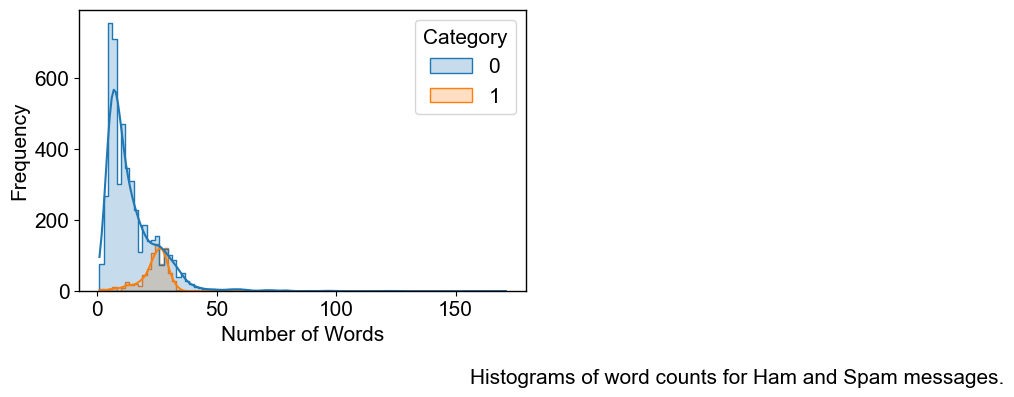

In [15]:
numeric_cols = ['word_count']
rows = math.ceil(len(numeric_cols) / 3)

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()
subplot_labels = [f"{chr(97+i)})" for i in range(len(numeric_cols))]

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(data=df, x=col, hue='Category', kde=True, ax=ax, element="step")
    
    ax.set_title("")
    ax.set_xlabel("Number of Words")
    ax.set_ylabel("Frequency")
    
    
    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.01, "Histograms of word counts for Ham and Spam messages.", 
         ha="center", fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("histogram_word_count.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

C:\Users\KESHA\AppData\Local\Temp\ipykernel_9964\2628686910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=col, data=df, ax=ax, palette='Set2')


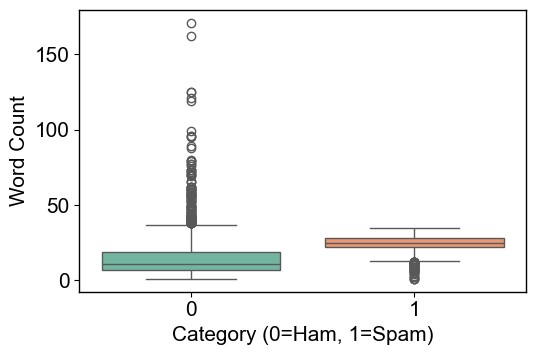

In [14]:
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(x='Category', y=col, data=df, ax=ax, palette='Set2')
    
    ax.set_title("")
    ax.set_xlabel("Category (0=Ham, 1=Spam)")
    ax.set_ylabel("Word Count")
    

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("boxplot_word_count.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

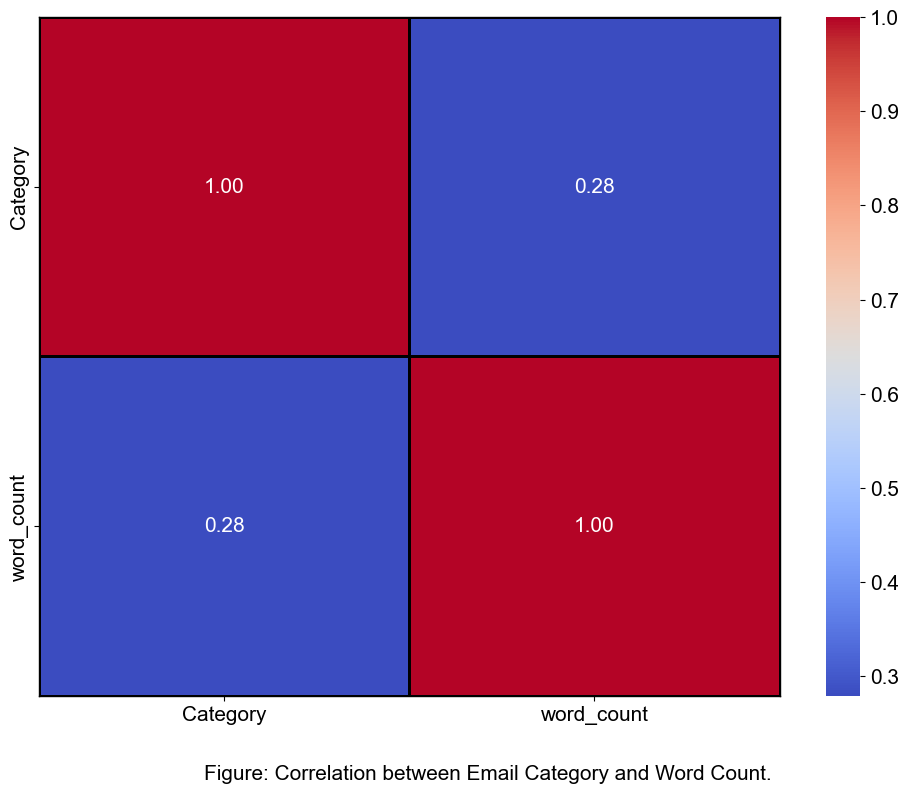

In [13]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['Category', 'word_count']].corr()
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor='black')

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(bxwidth)

plt.figtext(0.5, 0.01, "Figure: Correlation between Email Category and Word Count.", 
            ha="center", fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("correlation_email_features.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()